In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("./results.csv")
df.head()

,participant_email,puzzle_id,max_moves,player_moves,time_taken_seconds
0,jhcho001107@gmail.com,dataset-1,2,3,7
1,jhcho001107@gmail.com,dataset-14,3,3,6
2,jinnym210@gmail.com,dataset-1,2,2,7
3,jinnym210@gmail.com,dataset-14,3,3,8
4,jinnym210@gmail.com,dataset-52,4,4,4


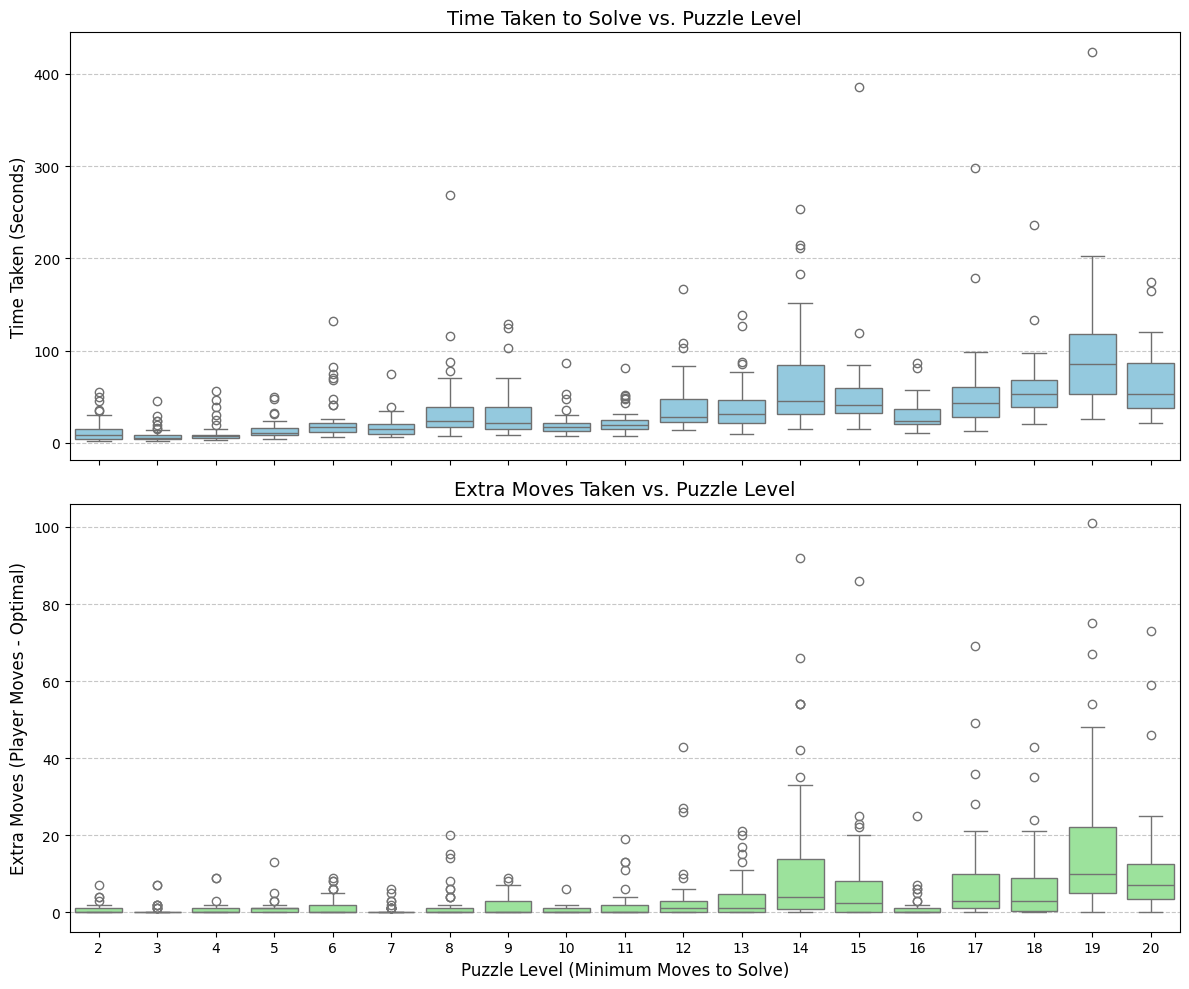

In [18]:
# Calculate 'excess_moves' to measure efficiency
# Excess Moves = Actual Moves Taken - Optimal Minimum Moves
df['excess_moves'] = df['player_moves'] - df['max_moves']

# Create a figure with two subplots to show different aspects of difficulty
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot 1: Time Difficulty
# Boxplot shows the median and spread of time taken for each level
sns.boxplot(x='max_moves', y='time_taken_seconds', data=df, ax=ax1, color='skyblue')
ax1.set_title('Time Taken to Solve vs. Puzzle Level', fontsize=14)
ax1.set_ylabel('Time Taken (Seconds)', fontsize=12)
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot 2: Cognitive Difficulty (Efficiency)
# Boxplot shows how many "extra" moves players needed
sns.boxplot(x='max_moves', y='excess_moves', data=df, ax=ax2, color='lightgreen')
ax2.set_title('Extra Moves Taken vs. Puzzle Level', fontsize=14)
ax2.set_xlabel('Puzzle Level (Minimum Moves to Solve)', fontsize=12)
ax2.set_ylabel('Extra Moves (Player Moves - Optimal)', fontsize=12)
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('difficulty_analysis.png')
plt.show()

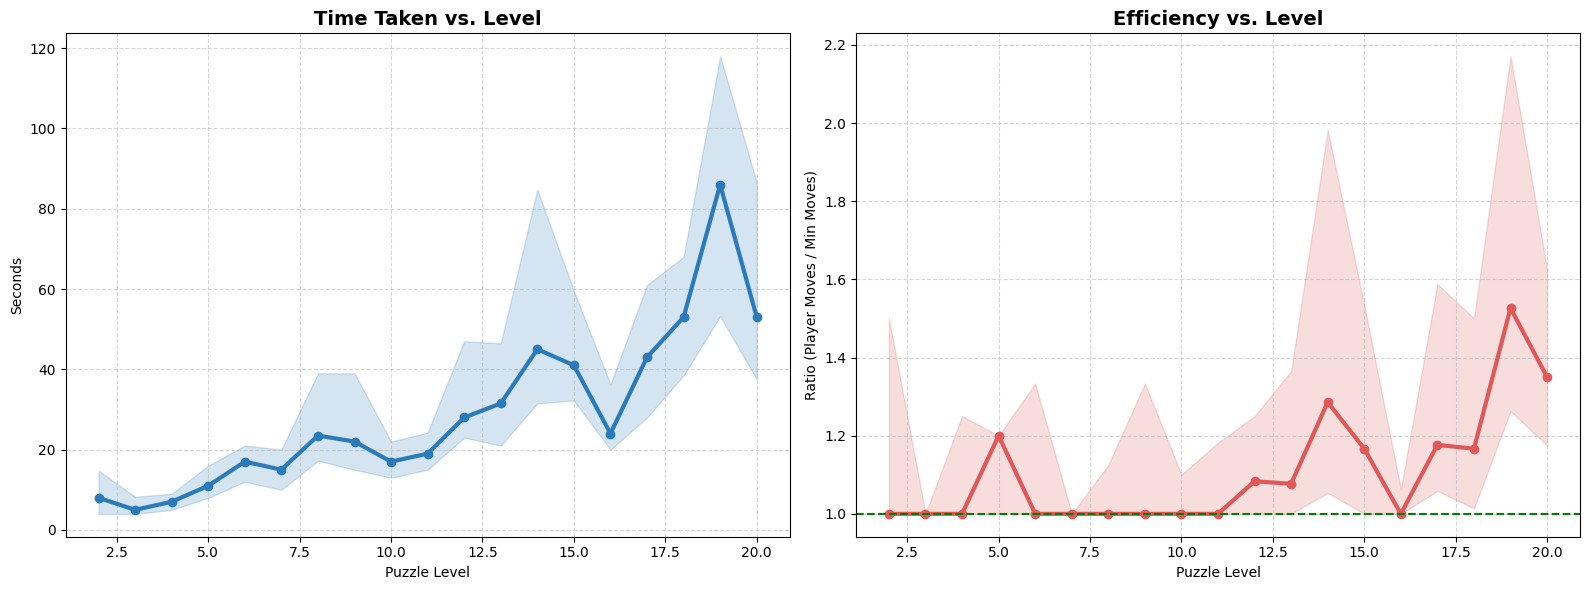

In [19]:
# Metric: Optimality Ratio (1.0 = Perfect)
df['optimality_ratio'] = df['player_moves'] / df['max_moves']

# Aggregate stats by level to smooth out the noise
stats = df.groupby('max_moves').agg(
    median_time=('time_taken_seconds', 'median'),
    p25_time=('time_taken_seconds', lambda x: x.quantile(0.25)),
    p75_time=('time_taken_seconds', lambda x: x.quantile(0.75)),
    median_ratio=('optimality_ratio', 'median'),
    p25_ratio=('optimality_ratio', lambda x: x.quantile(0.25)),
    p75_ratio=('optimality_ratio', lambda x: x.quantile(0.75))
).reset_index()

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Time Trend
ax1.plot(stats['max_moves'], stats['median_time'], marker='o', color='#2b7bba', linewidth=3, label='Median Time')
ax1.fill_between(stats['max_moves'], stats['p25_time'], stats['p75_time'], color='#2b7bba', alpha=0.2, label='Typical Range (25-75%)')
ax1.set_title('Time Taken vs. Level', fontsize=14, fontweight='bold')
ax1.set_xlabel('Puzzle Level')
ax1.set_ylabel('Seconds')
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot 2: Efficiency Trend
ax2.plot(stats['max_moves'], stats['median_ratio'], marker='o', color='#e05858', linewidth=3, label='Median Optimality Ratio')
ax2.fill_between(stats['max_moves'], stats['p25_ratio'], stats['p75_ratio'], color='#e05858', alpha=0.2, label='Typical Range')
ax2.axhline(y=1.0, color='green', linestyle='--', label='Perfect Play')
ax2.set_title('Efficiency vs. Level', fontsize=14, fontweight='bold')
ax2.set_xlabel('Puzzle Level')
ax2.set_ylabel('Ratio (Player Moves / Min Moves)')
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('clear_trends.png')
plt.show()